## **Fitting Tutorial**

In [1]:
import PyPWA as pwa
import pandas
import numpy as npy
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Define Waves for Fit (and input initial values of minuit and fitted parameters).*
>In this example (as expected by the defined amplitude)\
>each wave is defined by (epsilon.l.m) and each parameter has a real and imaginary part.\
>i.e a epsilon=-1, l=1 (P wave), m=1  will produce Vs(r.-1.1.1) and Vs(i.-1.1.1) names.\
>(In this example the imaginary part of the P-wave is kept fixed at 0 value\
>in the fit)

In [2]:
Vs = {"errordef": 1}
initial = []
for param_type in ["r", "i"]:
    initial.append(f"{param_type}.1.0.0")
    initial.append(f"{param_type}.1.1.0")
    initial.append(f"{param_type}.1.1.1")
    initial.append(f"{param_type}.1.2.0")
    initial.append(f"{param_type}.1.2.1")
    initial.append(f"{param_type}.1.2.2")
#    initial.append(f"{param_type}.1.3.1")
#    initial.append(f"{param_type}.1.4.1")
    
    Vs[f"{param_type}.1.0.0"] = 10
    Vs[f"limit_{param_type}.1.0.0"] = [-500, 1500.]
    Vs[f"error_{param_type}.1.0.0"] = .1
#    Vs[f"fix_i.-1.0.0"] = True

    Vs[f"{param_type}.1.1.0"] = 10
    Vs[f"limit_{param_type}.1.1.0"] = [-500, 1500.]
    Vs[f"error_{param_type}.1.1.0"] = .1

    Vs[f"{param_type}.1.1.1"] = 10
    Vs[f"limit_{param_type}.1.1.1"] = [-500, 1500.]
    Vs[f"error_{param_type}.1.1.1"] = .1
    Vs[f"fix_i.1.1.1"] = True
        
    Vs[f"{param_type}.1.2.0"] = 10
    Vs[f"limit_{param_type}.1.2.0"] = [-500, 1500.]
    Vs[f"error_{param_type}.1.2.0"] = .1
    
    Vs[f"{param_type}.1.2.1"] = 10
    Vs[f"limit_{param_type}.1.2.1"] = [-500, 1500.]
    Vs[f"error_{param_type}.1.2.1"] = .1
       
    Vs[f"{param_type}.1.2.2"] = 10
    Vs[f"limit_{param_type}.1.2.2"] = [-500, 1500.]
    Vs[f"error_{param_type}.1.2.2"] = .1 
    
#    Vs[f"{param_type}.1.3.1"] = 10
#    Vs[f"limit_{param_type}.1.3.1"] = [-500, 1500.]
#    Vs[f"error_{param_type}.1.3.1"] = .1
    
#    Vs[f"{param_type}.1.4.1"] = 10
#    Vs[f"limit_{param_type}.1.4.1"] = [-500, 1500.]
#    Vs[f"error_{param_type}.1.4.1"] = .1
    
Vs[f"i.1.1.1"] = 0.1

# Read data and montecarlos (accepted and generated) samples

In [3]:
datasample =  pandas.read_csv("simdata_JPAC-np.csv")
#accmcsample = pandas.read_csv("simdata5.csv")
#rawmcsample = pandas.read_csv("simdata5.csv")
#datasample = pwa.read("etapi_data_data.txt")
#accmcsample = pwa.read("etapi_acc.txt")
accmcsample = pwa.read("../TUTORIAL_FILES/etapi_acc.txt")
rawmcsample = pwa.read("../TUTORIAL_FILES/etapi_raw.txt")

# Binning of the data/monte-carlo and __define amplitude (function) to fit__*
> Here the user difine number of bins, variable to be binned and range

In [4]:
#import AmplitudeOLDfit
#amplitude = AmplitudeOLDfit.FitAmplitude(initial)
import AmplitudeJPACfit
amplitude = AmplitudeJPACfit.FitAmplitude(initial)
#Define number of bins 
nbins = 20
binsda = pwa.bin_by_range(datasample, "mass", nbins, .6, 2.0)
binsma = pwa.bin_by_range(accmcsample, accmcsample["mass"], nbins, .6, 2.0)
binsmr = pwa.bin_by_range(rawmcsample, rawmcsample["mass"], nbins, .6, 2.0)

*Check that bins have enough number of events for fit*

In [5]:
for bin in binsda:
    print(len(bin))

6577
9364
16674
45953
127024
48129
21406
23014
41661
58948
20078
5179
3404
5434
11026
18505
19504
13486
8425
5481


# Fitting with Minuit and Extended LogLikelihood
> Look at other possibilities through pypwa (use the ?pwa command\
> or see https://pypwa.jlab.org or https://github.com/JeffersonLab/PyPWA)

In [6]:
from IPython.display import display
intensities = []
for the_bin in binsda:
#    amp = AmplitudeJPACfit.FitAmplitude(initial)
    amplitude.setup(the_bin)
#    intensities.append(amplitude.calculate(Vs))
    display(pandas.DataFrame(amplitude.calculate(Vs)))

,0
0,524.818443
1,112.544543
2,75.976211
3,64.049006
4,143.808291
...,...
6572,105.370331
6573,78.846342
6574,120.701116
6575,1477.089631


,0
0,86.996618
1,447.912162
2,161.396588
3,759.107477
4,471.011055
...,...
9359,161.296093
9360,68.394902
9361,120.358836
9362,146.710380


,0
0,102.392089
1,595.649766
2,65.344248
3,280.705037
4,602.855631
...,...
16669,67.959747
16670,124.297777
16671,301.015157
16672,456.641653


,0
0,4.379040
1,29.951455
2,7.905595
3,7.029131
4,710.321421
...,...
45948,10.878720
45949,945.802674
45950,206.911768
45951,179.314430


,0
0,45.201774
1,43.788671
2,68.660084
3,9.205558
4,114.399723
...,...
127019,126.680693
127020,1049.419573
127021,51.796865
127022,157.035089


,0
0,274.367106
1,35.553065
2,522.821937
3,92.515519
4,33.446217
...,...
48124,25.919379
48125,75.859785
48126,48.402383
48127,293.509456


,0
0,45.795303
1,15.878769
2,21.845367
3,14.488416
4,344.731653
...,...
21401,59.818207
21402,13.964827
21403,128.051507
21404,176.612802


,0
0,118.713985
1,67.395399
2,27.073464
3,112.184943
4,67.211745
...,...
23009,20.237335
23010,1213.036052
23011,53.378732
23012,99.544672


,0
0,148.878988
1,88.325662
2,53.639603
3,58.828367
4,1037.404460
...,...
41656,507.615053
41657,317.901180
41658,30.504177
41659,62.302882


,0
0,110.002848
1,100.119518
2,35.670939
3,104.887662
4,73.708474
...,...
58943,135.970979
58944,99.755129
58945,155.988587
58946,80.796297


,0
0,18.156982
1,770.564549
2,120.300152
3,62.457731
4,65.750478
...,...
20073,84.231031
20074,914.184940
20075,60.042079
20076,412.368861


,0
0,398.611511
1,55.839262
2,77.243593
3,1304.790980
4,72.391068
...,...
5174,36.506975
5175,1115.010985
5176,143.689987
5177,48.646845


,0
0,60.668913
1,34.574231
2,135.356656
3,1201.104334
4,60.986209
...,...
3399,1428.391920
3400,1399.261054
3401,66.499178
3402,98.375089


,0
0,103.818553
1,113.029484
2,105.535405
3,956.658340
4,37.009373
...,...
5429,109.659727
5430,245.627433
5431,89.075206
5432,46.218475


,0
0,117.917716
1,60.368189
2,106.026393
3,18.873867
4,867.596778
...,...
11021,49.616098
11022,1108.300986
11023,121.330039
11024,625.404605


,0
0,1110.502242
1,345.911006
2,39.504982
3,99.835906
4,75.525220
...,...
18500,529.065292
18501,119.301695
18502,106.702676
18503,276.974839


,0
0,68.286312
1,39.953749
2,60.416889
3,50.038970
4,64.739444
...,...
19499,77.684112
19500,129.915471
19501,106.508003
19502,77.068989


,0
0,339.181092
1,122.302602
2,634.641964
3,151.480484
4,95.661702
...,...
13481,720.673161
13482,235.111937
13483,729.677239
13484,48.733459


,0
0,171.258809
1,540.359474
2,73.843787
3,70.820574
4,55.000461
...,...
8420,177.519620
8421,435.200540
8422,1199.026642
8423,1107.307499


,0
0,83.857029
1,114.315472
2,208.307961
3,188.421035
4,17.385281
...,...
5476,697.596041
5477,94.189151
5478,114.175654
5479,71.607560


In [7]:
results = []
for index, dbin in enumerate(binsda):
    with pwa.LogLikelihood(
        amplitude, dbin, binsma[index], generated_length=len(binsmr[index])) as Likelihood:
        results.append(
            pwa.minuit(initial, Vs, Likelihood, 1, 2, 2000)
        )

*Looking at the results of fitting*

In [8]:
failed = 0
for index, result in enumerate(results):
    display(f"Bin #{index}:")
    display(result.get_fmin())
    try:
        display(result.get_param_states())
    except:
        failed += 1
        pass

display(f"{(failed / len(results)) * 100}% ({failed})Failed. ")

'Bin #0:'

------------------------------------------------------------------
| FCN = -5.432E+04              |     Ncalls=767 (767 total)     |
| EDM = 0.000149 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    133    |    18     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |     6     |     9     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |   -1.4    |    2.2    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    55     |    14     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    67     |    11     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    66     |     9     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    79     |    30     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    -7     |     12    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    57     |    17     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    36     |    19     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    30     |    20     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #1:'

------------------------------------------------------------------
| FCN = -8.009E+04              |    Ncalls=1359 (1359 total)    |
| EDM = 0.00172 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    -50    |     60    |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -39    |     22    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    2.5    |    6.5    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    -4     |     33    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    -33    |     27    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -23    |     28    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    186    |    18     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    -7     |     17    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    82     |     5     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    76     |    11     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    81     |     8     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #2:'

------------------------------------------------------------------
| FCN = -1.504E+05              |    Ncalls=2607 (2607 total)    |
| EDM = 0.00186 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   False   |        True        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    100    |    160    |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -6     |     10    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    -4     |     7     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    50     |    50     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    70     |    40     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    60     |    50     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    260    |    60     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    2.7    |    2.9    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    78     |    28     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    60     |    40     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    70     |    40     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #3:'

------------------------------------------------------------------
| FCN = -4.538E+05              |    Ncalls=1108 (1108 total)    |
| EDM = 0.00788 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    395    |    28     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -8     |     9     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    -5     |     4     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    45     |    11     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |     4     |    14     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    27     |    12     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    310    |    40     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |     8     |    11     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    82     |    11     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    125    |    10     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    110    |    11     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #4:'

------------------------------------------------------------------
| FCN = -1.371E+06              |    Ncalls=2001 (2001 total)    |
| EDM = 0.00707 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   False   |        True        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    580    |    60     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    10     |     7     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |     5     |     5     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    -77    |     13    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    -82    |     11    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -76    |     10    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    640    |    50     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    -9     |     4     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    96     |     6     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    95     |     9     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    100    |    11     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #5:'

------------------------------------------------------------------
| FCN = -4.759E+05              |    Ncalls=1560 (1560 total)    |
| EDM = 0.000158 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    -3     |     16    |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    165    |    11     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    125    |    13     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |   -2.9    |    5.5    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |   -1.8    |    7.3    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    2.1    |   11.2    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    475    |     7     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |     6     |     5     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |   -106    |     7     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   -118    |     7     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |   -95.4   |    2.8    |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #6:'

------------------------------------------------------------------
| FCN = -1.975E+05              |    Ncalls=1431 (1431 total)    |
| EDM = 6.85E-06 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |   -1.1    |    14.4   |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    94     |     4     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    74     |     7     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |     6     |     8     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |   -0.4    |    7.8    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |     6     |    13     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |   237.5   |    3.0    |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |     3     |     4     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |   -150    |     3     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   -146    |     4     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |  -139.8   |    2.8    |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #7:'

------------------------------------------------------------------
| FCN = -2.144E+05              |    Ncalls=1645 (1645 total)    |
| EDM = 2.65E-05 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    -80    |     19    |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -5     |     6     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    -12    |     7     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    0.7    |   27.3    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |     4     |    31     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -8     |     25    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |   -139    |     11    |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |   -3.5    |    2.6    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |   203.4   |    2.6    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   198.9   |    3.0    |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    195    |     4     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #8:'

------------------------------------------------------------------
| FCN = -4.129E+05              |    Ncalls=1510 (1510 total)    |
| EDM = 1.59E-06 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |   -3.1    |    16.3   |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    2.1    |    5.3    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |   0.06    |   3.26    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    156    |    29     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    243    |    20     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    167    |    27     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    105    |     8     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    1.0    |    4.9    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |   -248    |     19    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   -169    |     29    |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |   -223    |     20    |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #9:'

------------------------------------------------------------------
| FCN = -6.071E+05              |    Ncalls=1829 (1829 total)    |
| EDM = 0.00232 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    50     |    21     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -9     |     9     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |   -0.8    |    10.2   |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    -80    |     80    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    25     |    89     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -30    |     80    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |   0.16    |   10.69   |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |     6     |     3     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |   -344    |     18    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   -357    |     7     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |   -340    |     7     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #10:'

------------------------------------------------------------------
| FCN = -1.854E+05              |    Ncalls=1098 (1098 total)    |
| EDM = 0.00301 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    36     |    11     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -8     |     16    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    1.6    |    3.4    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    202    |    12     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    203    |     6     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    195    |     4     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    31     |    15     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    -48    |     7     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    -30    |     70    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    17     |    66     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |     5     |    69     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #11:'

------------------------------------------------------------------
| FCN = -4.068E+04              |    Ncalls=1721 (1721 total)    |
| EDM = 0.000158 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    16     |    59     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |     6     |     9     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |     6     |     8     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    -70    |     60    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    -70    |     60    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -80    |     60    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    66     |    19     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    2.8    |    4.8    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    70     |    70     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    70     |    60     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    70     |    70     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #12:'

------------------------------------------------------------------
| FCN = -2.508E+04              |    Ncalls=1372 (1372 total)    |
| EDM = 7.06E-05 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    -36    |     15    |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    -9     |     5     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    -5     |     5     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    60     |    23     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    57     |    23     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    51     |    22     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    36     |    16     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    1.2    |    5.0    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    56     |    24     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    58     |    22     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    54     |    21     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #13:'

------------------------------------------------------------------
| FCN = -4.279E+04              |    Ncalls=1079 (1079 total)    |
| EDM = 0.000103 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    15     |    10     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    43     |     7     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    31     |     9     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    -11    |     15    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    -12    |     12    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -18    |     16    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    -20    |     4     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |     4     |     6     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |   102.4   |    3.1    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    102    |     3     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    97     |     4     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #14:'

------------------------------------------------------------------
| FCN = -9.5E+04                |    Ncalls=1294 (1294 total)    |
| EDM = 0.000535 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    -11    |     14    |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    2.4    |    6.6    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    2.8    |    4.6    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    115    |    23     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    90     |    26     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    97     |    28     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    -4     |     14    |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |   -2.9    |    6.1    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    103    |    25     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    123    |    19     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    112    |    25     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #15:'

------------------------------------------------------------------
| FCN = -1.692E+05              |    Ncalls=1111 (1111 total)    |
| EDM = 0.00244 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |     8     |    19     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |   -2.5    |    9.3    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |     3     |     4     |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    193    |     9     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    198    |     3     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    190    |    15     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    40     |    40     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    -28    |     13    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    -22    |     75    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   -2.7    |    59.9   |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    -25    |     87    |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #16:'

------------------------------------------------------------------
| FCN = -1.798E+05              |    Ncalls=1159 (1159 total)    |
| EDM = 0.00754 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |     9     |    13     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |   -2.1    |    5.4    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    2.3    |    3.1    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    201    |     7     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    196    |    17     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    197    |     7     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    40     |    23     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    -14    |     13    |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    17     |    77     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    50     |    70     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    19     |    81     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #17:'

------------------------------------------------------------------
| FCN = -1.193E+05              |    Ncalls=1486 (1486 total)    |
| EDM = 0.000675 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    21     |    13     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |    0.5    |    7.1    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |  -0.013   |   3.887   |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    165    |     7     |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    164    |    16     |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    166    |     6     |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    28     |    25     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |    15     |    17     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    11     |    96     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    40     |    80     |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    13     |    97     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #18:'

------------------------------------------------------------------
| FCN = -7.069E+04              |    Ncalls=1547 (1547 total)    |
| EDM = 0.000113 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |    12     |    49     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |   -2.7    |    9.7    |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    0.5    |    4.2    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    110    |    120    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    90     |    150    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    90     |    140    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    -20    |     41    |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |   -1.8    |    13.4   |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    -80    |    170    |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |    -90    |    150    |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    -90    |    140    |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'Bin #19:'

------------------------------------------------------------------
| FCN = -4.365E+04              |    Ncalls=1778 (1778 total)    |
| EDM = 0.000126 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | r.1.0.0 |     4     |    23     |            |            |  -500   |  1500   |       |
| 1 | r.1.1.0 |     5     |    14     |            |            |  -500   |  1500   |       |
| 2 | r.1.1.1 |    -10    |     13    |            |            |  -500   |  1500   |       |
| 3 | r.1.2.0 |    -24    |     29    |            |            |  -500   |  1500   |       |
| 4 | r.1.2.1 |    -5     |     31    |            |            |  -500   |  1500   |       |
| 5 | r.1.2.2 |    -22    |     28    |            |            |  -500   |  1500   |       |
| 6 | i.1.0.0 |    26     |     5     |            |            |  -500   |  1500   |       |
| 7 | i.1.1.0 |     3     |     3     |            |            |  -500   |  1500   |       |
| 8 | i.1.1.1 |   0.10    |   0.10    |            |            |  -500   |  1500   |  yes  |
| 9 | i.1.2.0 |    103    |     7     |            |            |  -500   |  1500   |       |
| 10| i.1.2.1 |   106.7   |    2.7    |            |            |  -500   |  1500   |       |
| 11| i.1.2.2 |    103    |     6     |            |            |  -500   |  1500   |       |
---------------------------------------------------------------------------------------------

'0.0% (0)Failed. '

*Checking the waves used (and filling waves variable for later use)*

In [9]:
waves = amplitude.make_elm(result.values)
#waves = AmplitudeJPACfit.FitAmplitude.make_elm(result.values)
waves

,e,l,m
0,1,0,0
1,1,1,0
2,1,1,1
3,1,2,0
4,1,2,1
5,1,2,2


*Filling strings with wave names (for plotting)*

In [10]:
wave = npy.empty(len(waves),dtype="int")
string = npy.empty(len(waves),dtype="U5")
for index, w in waves.iterrows():
    #print(w["l"])
    string[index]= "{}{}{}".format(w["e"],w["l"],w["m"])
    wave[index]=w.name

*Getting the bin mass values and number of events in datasample for those bins*

In [11]:
bmass=[]
mcounts=[]
for index, bin in enumerate(binsda):
    if len(bin)==0:
        bmass.append(0.)
        mcounts.append(0.)
    else:
        bmass.append(npy.average(bin["mass"]))
        mcounts.append(len(bin))

# Calculating the expected number of events in a a mass bin

In [12]:
total_nExp = npy.empty(len(binsma))
for index, the_bin, result in zip(range(len(binsma)), binsma, results):
#    amp = testAmplitudeFit.FitAmplitude(initial)
#    amp = AmplitudeJPACfit.FitAmplitude(initial)
    amp=amplitude
    amp.setup(the_bin)
    total_nExp[index] = npy.average(amp.calculate(result.values))

*Plot expected number of events vs mass and data vs mass (both should agree if fitting worked)*

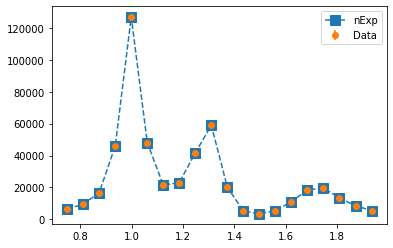

In [13]:
import matplotlib.pyplot as plt
mni = npy.empty(len(total_nExp), dtype=[("mass", float), ("int", float)])
mda = npy.empty(len(mcounts), dtype=[("mass", float), ("intd", float)])
mni["mass"] = bmass
mni["int"] = total_nExp
mni = pandas.DataFrame(mni)
counts, bin_edges = npy.histogram(mni["mass"], nbins, weights=mni["int"])
mda["mass"] = bmass
mda["intd"] = mcounts
mda = pandas.DataFrame(mda)
dcounts, bin_edges = npy.histogram(mda["mass"], nbins, weights=mda["intd"])
#dcounts, bin_edges = npy.histogram(bmass, nbins, weights=total_nExp)
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
yerr = npy.empty(nbins)
yerr = npy.sqrt(counts)
myerr = npy.empty(nbins)
myerr = npy.sqrt(dcounts)
#plt.errorbar(centers,counts, yerr, fmt="s",linestyle="dashed",markersize='10',label="nExp")
plt.errorbar(centers,total_nExp, yerr, fmt="s",linestyle="dashed",markersize='10',label="nExp")
plt.errorbar(centers,mcounts, myerr, fmt="o",label="Data")
#plt.xlim(.6, 3.2)
#plt.ylim(0.,65000)
plt.legend(loc='upper right')
plt.show()

Calculate initial intensities (in case we need to check them)

In [14]:
intensities = []
for the_bin in binsda:
#    amp = AmplitudeJPACfit.FitAmplitude(initial)
    amp.setup(the_bin)
    intensities.append(amp.calculate(Vs))
intesities=pandas.DataFrame(intensities)

# Calculate the expected number of events for each wave (vs mass)

In [15]:
wave_nExp = npy.empty([len(waves),len(binsma)],"f16")
for i in range(len(waves)):
    for index, the_bin, result in zip(range(len(binsma)), binsma, results):
#        amp = testAmplitudeFit.FitAmplitude(initial)
        amp.setup(the_bin)
        wave_nExp[i][index] = npy.average(amp.calculate_wave(result.values,wave[i]))


*Plot expected number of events  vs mass for each wave*

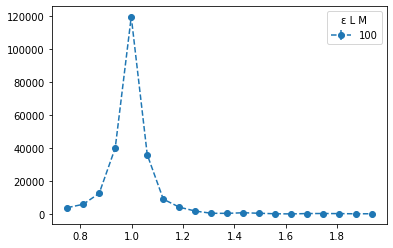

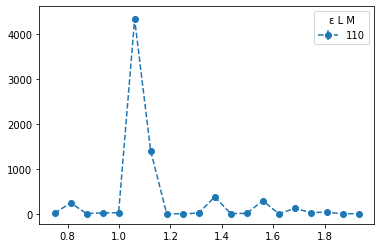

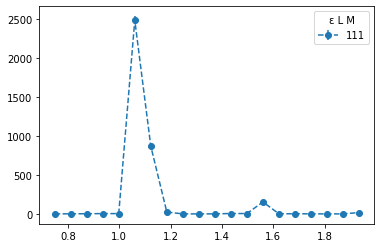

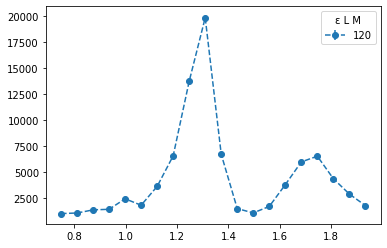

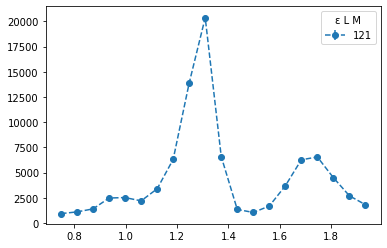

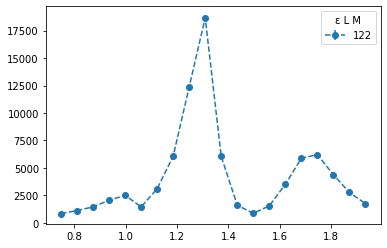

In [16]:
for i in range(len(waves)):
    mni0 = npy.empty(len(wave_nExp[i]), dtype=[("mass", float), ("int0", float)])
    mni0["mass"] = bmass
    mni0["int0"] = wave_nExp[i]
    mni0 = pandas.DataFrame(mni0)
    counts0, bin_edges = npy.histogram(mni0["mass"], nbins, weights=mni0["int0"])
    centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
    yerr = npy.empty(nbins)
    yerr = npy.sqrt(counts0)
    plt.errorbar(centers,wave_nExp[i], yerr, linestyle="dashed", fmt="o",label=string[i])
   
    plt.legend(loc='upper right', title="ε L M")
    plt.show()

# Expected number of events vs mass for each wave in a same plot

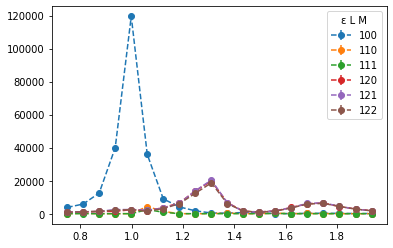

In [17]:
for i in range(len(waves)):
    plt.errorbar(centers,wave_nExp[i], yerr, linestyle="dashed",fmt="o",label=string[i])
    plt.legend(loc='upper right', title="ε L M")
plt.show()

Calculate Moments

In [18]:
H000,H010,H011,H020,H021,H022,H100,H110,H111,H120,H121,H122,sigma4,sigmay = amp.calculate_moments_JPAC(result.values)
#H00,H11,H10,H20,H21,H22 = amp.calculate_moments_STD()

# Calculate PhaseMotion between two waves
> In this example between 2nd and 3rd waves in amp list

ValueError: x and y must be the same size

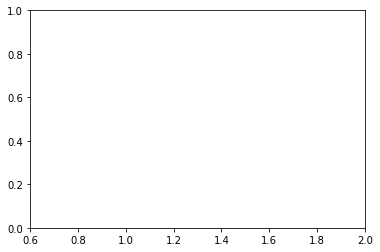

In [21]:
plt.xlim(0.6, 2.)
plt.scatter(mni["mass"],H000,LABEL="H000")
plt.scatter(mni["mass"],H100,LABEL="H100")
plt.legend(loc='upper right')
plt.show()


In [18]:
phase = npy.empty(len(binsda))
for index, the_bin, result in zip(range(len(binsda)), binsda, results):
#    amp = testAmplitudeFit.FitAmplitude()
#    amp = AmplitudeJPACfit.FitAmplitude(initial)
    amp.setup(the_bin)
    phase[index] = amp.Phasediff(result.values,wave[4],wave[2])

*Plot PhaseMotion*

<ErrorbarContainer object of 3 artists>

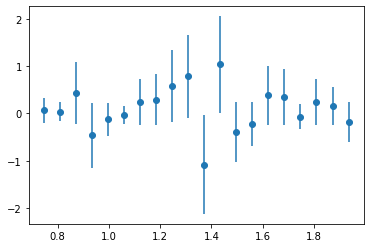

In [19]:
mnip = npy.empty(len(bmass), dtype=[("mass", float), ("intp", float)])
mnip["mass"] = bmass
mnip["intp"] = phase
mnip = pandas.DataFrame(mnip)
countsp, bin_edges = npy.histogram(mnip["mass"], nbins, weights=mnip["intp"])
#countsp, bin_edges = npy.histogram(mnip["mass"], 25)

centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
yerr = npy.empty(nbins)
yerr = npy.sqrt(npy.abs(countsp))
plt.errorbar(centers,countsp, yerr, fmt="o")
#plt.xlim(.6, 2.5)

# Write fitted values (of production amplitudes) to disk

In [20]:
final_values = pandas.DataFrame([res.np_values() for res in results], columns=results[0].parameters)
final_values.to_csv("final_values_JPAC.csv", index=False)

In [21]:
pandas.DataFrame([res.np_errors() for res in results], columns=results[0].parameters)

,r.1.0.0,r.1.1.0,r.1.1.1,r.1.2.0,r.1.2.1,r.1.2.2,i.1.0.0,i.1.1.0,i.1.1.1,i.1.2.0,i.1.2.1,i.1.2.2
0,2.852249,2.454338,2.233434,2.357102,2.383402,2.626812,30.355296,23.058165,0.1,29.117763,19.515329,21.461233
1,4.143564,6.957555,2.850610,2.725406,2.577218,3.350895,24.972032,16.099636,0.1,20.407775,15.720090,14.143814
2,5.692306,4.785399,2.383390,8.044186,5.157728,3.613297,35.220094,15.107411,0.1,14.095800,13.392294,16.332394
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000
4,44.106133,13.751319,19.829211,10.964590,13.588421,15.587226,12.307185,5.567356,0.1,10.009993,9.033432,6.326170
5,34.436933,9.159502,11.498057,5.682668,8.133921,7.363222,28.735040,13.816089,0.1,11.345555,17.985841,17.540164
6,7.198252,8.374227,4.763529,4.189970,4.520014,3.353074,17.183687,11.151904,0.1,13.529245,17.287970,16.054413
7,11.671223,5.996570,4.279334,7.625037,5.538663,12.454837,19.612032,6.767201,0.1,15.038266,14.425965,25.855571
8,6.475163,5.382701,5.416978,8.161982,8.444590,8.678492,17.661079,8.321693,0.1,17.488448,10.915935,22.474796
9,8.721956,8.181113,8.761297,13.376127,16.434883,13.947150,17.630661,12.990305,0.1,25.651122,14.814478,25.210855


In [22]:
final_values

,r.1.0.0,r.1.1.0,r.1.1.1,r.1.2.0,r.1.2.1,r.1.2.2,i.1.0.0,i.1.1.0,i.1.1.1,i.1.2.0,i.1.2.1,i.1.2.2
0,111.704412,60.453623,59.805884,61.078017,61.115139,62.403759,1.320825,5.792675,0.1,2.262332,4.399611,-5.139527
1,137.562715,64.190450,62.573028,65.067900,65.866904,70.420397,-2.994290,29.600163,0.1,6.868300,2.703924,-7.967649
2,198.184937,64.268233,66.615670,64.595816,64.606409,69.656890,30.953681,20.593808,0.1,45.946604,29.400564,10.318831
3,337.491982,72.959054,66.363838,71.371487,88.351834,80.233547,110.288478,-5.319404,0.1,-1.097682,-44.011232,-12.085719
4,191.948115,72.071364,103.066780,91.422853,83.604409,72.393911,585.360143,5.557063,0.1,-13.656104,-10.491047,-6.151311
5,-229.743178,82.435298,69.243004,91.917776,101.022541,107.038100,275.792660,29.126976,0.1,-10.282243,-3.671119,-0.001849
6,-151.579375,86.849678,71.505687,129.835388,127.271735,119.766565,79.726460,59.105635,0.1,-22.104475,31.613361,10.078527
7,-76.655901,75.693118,103.524504,146.645818,156.565194,152.959609,-57.516859,68.733135,0.1,75.957406,47.150633,61.484341
8,-65.816781,86.599772,124.420103,216.389109,200.722624,222.109393,13.190943,59.468474,0.1,99.732686,131.442304,84.706465
9,-26.800948,67.763534,105.828129,269.445703,216.992426,244.480875,42.960919,39.327445,0.1,130.453626,215.905357,153.900684
